### Loading libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### Preparing the dataset 

In [2]:
df = pd.read_csv('car_fuel_efficiency.csv')
len(df)

9704

In [3]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB


Use only the following columns:

* `'engine_displacement'`,
* `'horsepower'`,
* `'vehicle_weight'`,
* `'model_year'`,
* `'fuel_efficiency_mpg'`

In [5]:
# Select only the required columns
columns = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
df = df[columns]
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


### EDA

* Look at the `fuel_efficiency_mpg` variable. Does it have a long tail? 

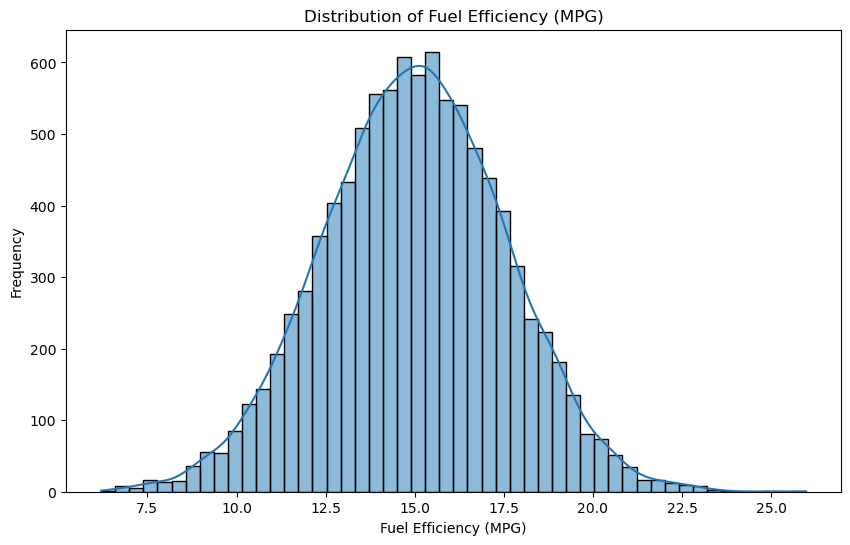

Mean: 14.99
Median: 15.01
Skewness: -0.01


In [6]:
# Visualize the distribution of fuel_efficiency_mpg
plt.figure(figsize=(10, 6))
sns.histplot(df['fuel_efficiency_mpg'], bins=50, kde=True)
plt.title('Distribution of Fuel Efficiency (MPG)')
plt.xlabel('Fuel Efficiency (MPG)')
plt.ylabel('Frequency')
plt.show()

# Check statistics
print(f"Mean: {df['fuel_efficiency_mpg'].mean():.2f}")
print(f"Median: {df['fuel_efficiency_mpg'].median():.2f}")
print(f"Skewness: {df['fuel_efficiency_mpg'].skew():.2f}")

### Question 1

There's one column with missing values. What is it?

* `'engine_displacement'`
* `'horsepower'`
* `'vehicle_weight'`
* `'model_year'`

In [7]:
# Check for missing values
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

### Question 2

What's the median (50% percentile) for variable `'horsepower'`?

- 49
- 99
- 149
- 199


In [8]:
# Calculate the median for horsepower
df['horsepower'].median()

149.0


### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [9]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

In [10]:
# First, let's prepare the target variable and features
y_train = df_train['fuel_efficiency_mpg'].values
y_val = df_val['fuel_efficiency_mpg'].values

# Remove target from features
df_train_features = df_train.drop('fuel_efficiency_mpg', axis=1)
df_val_features = df_val.drop('fuel_efficiency_mpg', axis=1)

In [11]:
# Option 1: Fill missing values with 0
df_train_0 = df_train_features.fillna(0)
df_val_0 = df_val_features.fillna(0)

# Train linear regression model
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

# Train model with 0-filled data
w0_0, w_0 = train_linear_regression(df_train_0.values, y_train)

# Make predictions on validation set
def predict(X, w0, w):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    return X.dot(np.concatenate([[w0], w]))

y_pred_0 = predict(df_val_0.values, w0_0, w_0)

# Calculate RMSE
def rmse(y_true, y_pred):
    error = y_true - y_pred
    mse = (error ** 2).mean()
    return np.sqrt(mse)

rmse_0 = round(rmse(y_val, y_pred_0), 2)
print(f"RMSE with 0-fill: {rmse_0}")

RMSE with 0-fill: 0.52


In [12]:
# Option 2: Fill missing values with mean (computed from training data only)
# Calculate mean from training data
train_mean = df_train_features.mean()

df_train_mean = df_train_features.fillna(train_mean)
df_val_mean = df_val_features.fillna(train_mean)

# Train model with mean-filled data
w0_mean, w_mean = train_linear_regression(df_train_mean.values, y_train)

# Make predictions on validation set
y_pred_mean = predict(df_val_mean.values, w0_mean, w_mean)

# Calculate RMSE
rmse_mean = round(rmse(y_val, y_pred_mean), 2)
print(f"RMSE with mean-fill: {rmse_mean}")

RMSE with mean-fill: 0.46


In [13]:
# Compare results
print("\n" + "="*50)
print("COMPARISON OF RESULTS")
print("="*50)
print(f"RMSE with 0-fill:    {rmse_0}")
print(f"RMSE with mean-fill: {rmse_mean}")
print("\nBetter option:", "0-fill" if rmse_0 < rmse_mean else "mean-fill")


COMPARISON OF RESULTS
RMSE with 0-fill:    0.52
RMSE with mean-fill: 0.46

Better option: mean-fill


### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If multiple options give the same best RMSE, select the smallest `r`.

In [14]:
# Implement regularized linear regression
# Fill NAs with 0 as instructed
df_train_q4 = df_train_features.fillna(0)
df_val_q4 = df_val_features.fillna(0)

# Function for regularized linear regression
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

# Test different values of r
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_scores = []

for r in r_values:
    # Train model with regularization parameter r
    w0, w = train_linear_regression_reg(df_train_q4.values, y_train, r=r)
    
    # Make predictions on validation set
    y_pred = predict(df_val_q4.values, w0, w)
    
    # Calculate RMSE
    score = round(rmse(y_val, y_pred), 2)
    rmse_scores.append(score)
    
    print(f"r = {r:6.2f}, RMSE = {score}")

# Find the best r (smallest RMSE, and if tied, smallest r)
best_rmse = min(rmse_scores)
best_r = r_values[rmse_scores.index(best_rmse)]

print("\n" + "="*50)
print(f"Best r: {best_r}")
print(f"Best RMSE: {best_rmse}")
print("="*50)

r =   0.00, RMSE = 0.52
r =   0.01, RMSE = 0.52
r =   0.10, RMSE = 0.52
r =   1.00, RMSE = 0.52
r =   5.00, RMSE = 0.52
r =  10.00, RMSE = 0.52
r = 100.00, RMSE = 0.52

Best r: 0
Best RMSE: 0.52


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.001
- 0.006
- 0.060
- 0.600

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

In [15]:
# Test different seed values for data splitting
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores_seeds = []

for seed in seed_values:
    # Set seed and shuffle data
    np.random.seed(seed)
    
    n = len(df)
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)
    
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    df_shuffled_temp = df.iloc[idx]
    
    # Split data
    df_train_temp = df_shuffled_temp.iloc[:n_train].copy()
    df_val_temp = df_shuffled_temp.iloc[n_train:n_train+n_val].copy()
    df_test_temp = df_shuffled_temp.iloc[n_train+n_val:].copy()
    
    # Prepare features and target
    y_train_temp = df_train_temp['fuel_efficiency_mpg'].values
    y_val_temp = df_val_temp['fuel_efficiency_mpg'].values
    
    df_train_features_temp = df_train_temp.drop('fuel_efficiency_mpg', axis=1)
    df_val_features_temp = df_val_temp.drop('fuel_efficiency_mpg', axis=1)
    
    # Fill missing values with 0
    df_train_features_temp = df_train_features_temp.fillna(0)
    df_val_features_temp = df_val_features_temp.fillna(0)
    
    # Train model without regularization
    w0_temp, w_temp = train_linear_regression(df_train_features_temp.values, y_train_temp)
    
    # Make predictions on validation set
    y_pred_temp = predict(df_val_features_temp.values, w0_temp, w_temp)
    
    # Calculate RMSE
    rmse_score = rmse(y_val_temp, y_pred_temp)
    rmse_scores_seeds.append(rmse_score)
    
    print(f"Seed = {seed}, RMSE = {rmse_score:.4f}")

# Calculate standard deviation
std_rmse = round(np.std(rmse_scores_seeds), 3)

print("\n" + "="*50)
print(f"Standard deviation of RMSE scores: {std_rmse}")
print("="*50)

Seed = 0, RMSE = 0.5207
Seed = 1, RMSE = 0.5213
Seed = 2, RMSE = 0.5228
Seed = 3, RMSE = 0.5160
Seed = 4, RMSE = 0.5109
Seed = 5, RMSE = 0.5283
Seed = 6, RMSE = 0.5314
Seed = 7, RMSE = 0.5091
Seed = 8, RMSE = 0.5147
Seed = 9, RMSE = 0.5132

Standard deviation of RMSE scores: 0.007


### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.15
- 0.515
- 5.15
- 51.5

In [16]:
# Question 6: Split with seed 9, combine train+val, train with r=0.001, test on test set

# Step 1: Split the dataset with seed 9
np.random.seed(9)

n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled_q6 = df.iloc[idx]

# Split data
df_train_q6 = df_shuffled_q6.iloc[:n_train].copy()
df_val_q6 = df_shuffled_q6.iloc[n_train:n_train+n_val].copy()
df_test_q6 = df_shuffled_q6.iloc[n_train+n_val:].copy()

# Step 2: Combine train and validation datasets
df_train_val_combined = pd.concat([df_train_q6, df_val_q6])

# Step 3: Prepare features and target
y_train_val = df_train_val_combined['fuel_efficiency_mpg'].values
y_test_q6 = df_test_q6['fuel_efficiency_mpg'].values

df_train_val_features = df_train_val_combined.drop('fuel_efficiency_mpg', axis=1)
df_test_features_q6 = df_test_q6.drop('fuel_efficiency_mpg', axis=1)

# Fill missing values with 0
df_train_val_features = df_train_val_features.fillna(0)
df_test_features_q6 = df_test_features_q6.fillna(0)

# Step 4: Train model with r=0.001
r_q6 = 0.001
w0_q6, w_q6 = train_linear_regression_reg(df_train_val_features.values, y_train_val, r=r_q6)

# Step 5: Make predictions on test set
y_pred_test_q6 = predict(df_test_features_q6.values, w0_q6, w_q6)

# Calculate RMSE on test dataset
rmse_test_q6 = round(rmse(y_test_q6, y_pred_test_q6), 2)

print("="*50)
print("QUESTION 6 RESULTS")
print("="*50)
print(f"Train + Validation size: {len(df_train_val_combined)}")
print(f"Test size: {len(df_test_q6)}")
print(f"Regularization parameter r: {r_q6}")
print(f"RMSE on test dataset: {rmse_test_q6}")
print("="*50)

QUESTION 6 RESULTS
Train + Validation size: 7764
Test size: 1940
Regularization parameter r: 0.001
RMSE on test dataset: 0.52
